In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy import stats
%matplotlib inline

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1a91928602efacb3650a4c99600d3e2


In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | acapulco
Processing Record 7 of Set 1 | porbandar
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | bambanglipuro
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | satitoa
City not found. Skipping...
Processing Record 12 of Set 1 | lima
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | adrar
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | moerai
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | tarauaca
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | letterkenny
Processing Record 

Processing Record 37 of Set 4 | narasannapeta
Processing Record 38 of Set 4 | labuhan
Processing Record 39 of Set 4 | kalmunai
Processing Record 40 of Set 4 | dhidhdhoo
Processing Record 41 of Set 4 | provideniya
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | brae
Processing Record 45 of Set 4 | bichura
Processing Record 46 of Set 4 | hanzhong
Processing Record 47 of Set 4 | phun phin
City not found. Skipping...
Processing Record 48 of Set 4 | canavieiras
Processing Record 49 of Set 4 | flinders
Processing Record 50 of Set 4 | camacupa
Processing Record 1 of Set 5 | dukat
Processing Record 2 of Set 5 | diamantino
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | chihuahua
Processing Record 6 of Set 5 | trinidad
Processing Record 7 of Set 5 | phetchabun
Processing Record 8 of Set 5 | sakakah
Processing Record 9 of Set 5 | zavallya
Proce

Processing Record 29 of Set 8 | kamloops
Processing Record 30 of Set 8 | belmonte
Processing Record 31 of Set 8 | maniitsoq
Processing Record 32 of Set 8 | asfi
Processing Record 33 of Set 8 | saint-augustin
Processing Record 34 of Set 8 | alton
Processing Record 35 of Set 8 | saint-malo
Processing Record 36 of Set 8 | hongjiang
Processing Record 37 of Set 8 | yulin
Processing Record 38 of Set 8 | gornopravdinsk
Processing Record 39 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 8 | aras
Processing Record 41 of Set 8 | noyabrsk
Processing Record 42 of Set 8 | grootfontein
Processing Record 43 of Set 8 | bandarbeyla
Processing Record 44 of Set 8 | kaka
Processing Record 45 of Set 8 | novoaleksandrovsk
Processing Record 46 of Set 8 | rogaska slatina
Processing Record 47 of Set 8 | sussex
Processing Record 48 of Set 8 | isla mujeres
Processing Record 49 of Set 8 | oranjemund
Processing Record 50 of Set 8 | jega
Processing Record 1 of Set 9 | louisbourg
City not found. Sk

Processing Record 16 of Set 12 | westport
Processing Record 17 of Set 12 | gazojak
Processing Record 18 of Set 12 | barkhera
Processing Record 19 of Set 12 | rafai
Processing Record 20 of Set 12 | bracebridge
Processing Record 21 of Set 12 | manavalakurichi
Processing Record 22 of Set 12 | shenjiamen
Processing Record 23 of Set 12 | worland
Processing Record 24 of Set 12 | bud
Processing Record 25 of Set 12 | vestmannaeyjar
Processing Record 26 of Set 12 | toamasina
Processing Record 27 of Set 12 | garowe
Processing Record 28 of Set 12 | san luis
Processing Record 29 of Set 12 | twin falls
Processing Record 30 of Set 12 | hun
Processing Record 31 of Set 12 | saint-georges
Processing Record 32 of Set 12 | kozhevnikovo
Processing Record 33 of Set 12 | oktyabrskoye
Processing Record 34 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 35 of Set 12 | san francisco
Processing Record 36 of Set 12 | rungata
City not found. Skipping...
Processing Record 37 of Set 12 | fortuna


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.61,-37.64,33.80,69,100,24.16,GL,2020-10-26 04:50:32
1,Puerto Ayora,-0.74,-90.35,66.99,89,62,8.12,EC,2020-10-26 04:50:32
2,Hilo,19.73,-155.09,80.60,74,40,5.82,US,2020-10-26 04:50:10
3,Mataura,-46.19,168.86,55.00,59,51,8.99,NZ,2020-10-26 04:50:32
4,Acapulco,16.86,-99.89,80.92,84,66,4.68,MX,2020-10-26 04:50:33


In [11]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gunjur,GM,2020-10-26 01:46:58,13.20,-16.73,80.60,94,0,9.33
1,Borogontsy,RU,2020-10-26 01:46:58,62.67,131.17,15.71,92,98,6.22
2,Atuona,PF,2020-10-26 01:46:58,-9.80,-139.03,79.05,73,0,19.69
3,Ushuaia,AR,2020-10-26 01:37:56,-54.80,-68.30,44.60,87,20,10.29
4,Hithadhoo,MV,2020-10-26 01:46:59,-0.60,73.08,83.70,65,10,6.24


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'10/25/20'

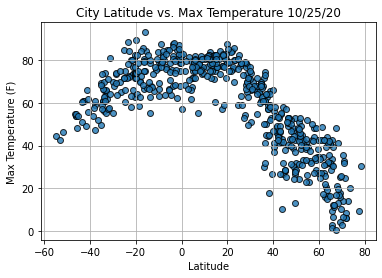

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

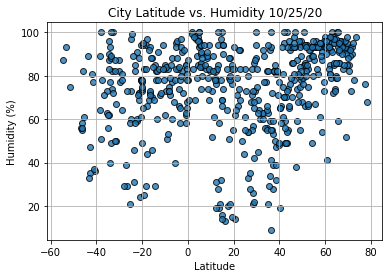

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


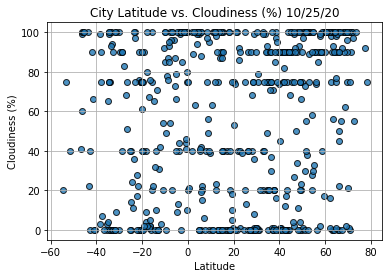

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

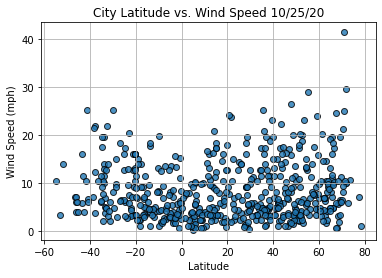

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Gunjur,GM,2020-10-26 01:46:58,13.20,-16.73,80.60,94,0,9.33
1,Borogontsy,RU,2020-10-26 01:46:58,62.67,131.17,15.71,92,98,6.22
7,Vostok,RU,2020-10-26 01:46:59,46.49,135.88,40.14,78,27,3.71
9,Noyabrsk,RU,2020-10-26 01:47:00,63.20,75.45,20.48,97,93,14.52
11,Tasiilaq,GL,2020-10-26 01:36:05,65.61,-37.64,33.80,59,100,19.46


In [20]:
from scipy.stats import linregress

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values,title,y_label,text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

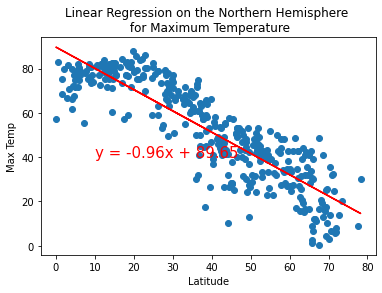

In [23]:
#Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature'),'Max Temp',(10,40))

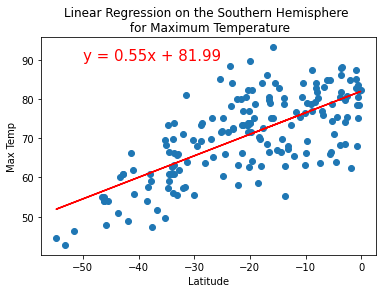

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature'), 'Max Temp',(-50,90))


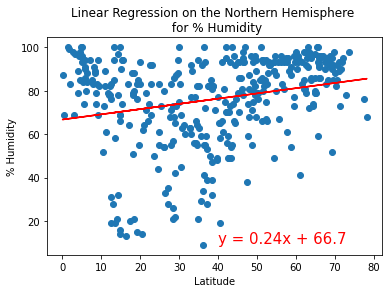

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity'), '% Humidity',(40,10))

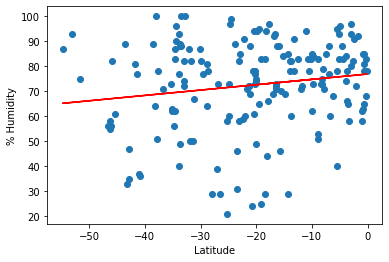

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

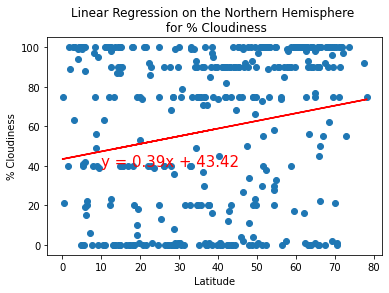

In [27]:
#Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,y_values,plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness'),'% Cloudiness',(10,40))

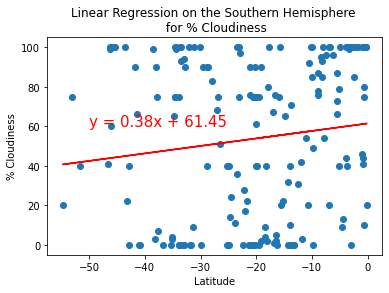

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness'), '% Cloudiness',(-50,60))

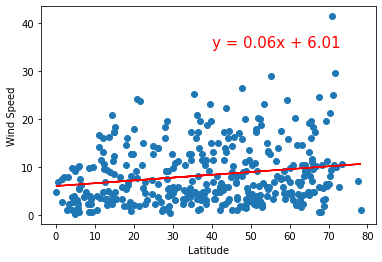

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

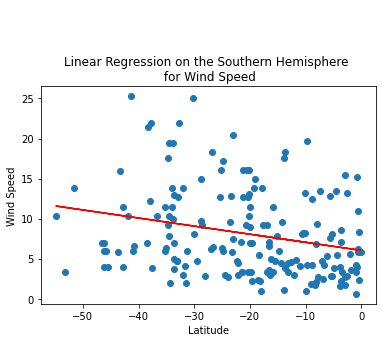

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed'), 'Wind Speed',(-50,35))